In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sps
from scipy import special
import lmfit as lm
import pymc3 as pm
import theano.tensor as tt

In [2]:
def two_rates(t,k1,k2):
    if k1==k2:
        return k1**2*np.exp(-k1*t)
    else:
        return k1*k2/(k1-k2)*(np.exp(-k2*t)-np.exp(-k1*t))
    
def three_rates(t,k1,k2,k3):
    return k1*k2*k3/(k1-k2)*((np.exp(-k1*t)-np.exp(-k3*t))/(k1-k3)-(np.exp(-k2*t)-np.exp(-k3*t))/(k2-k3))

def four_rates(t,k1,k2,k3,k4):
    result=np.exp(-k2*t)/(k2-k3)/(k2-k4)
    result+=np.exp(-k3*t)*(k2-k1)/(k3-k1)/(k3-k2)/(k3-k4)
    result+=np.exp(-k1*t)/(k1-k3)/(k4-k1)
    result+=np.exp(-k4*t)*(k2-k1)/(k4-k1)/(k4-k2)/(k4-k3)
    return result*k1*k2*k3*k4/(k1-k2)

In [3]:
ddc_t0_three = np.load("ddc_t0_three.npy")
k1_t0_three = np.load("k1_t0_three.npy")
k3_t0_three = np.load("k3_t0_three.npy")
k5_t0_three = np.load("k5_t0_three.npy")

In [11]:
with pm.Model() as model1:
    beta = pm.Uniform('beta', 0,10)
    measurement = pm.Gamma('measurement',alpha=1,beta=beta,observed=k3_t0_three)
        
    start = pm.find_MAP()
    trace1 = pm.sample(10000)

Optimization terminated successfully.
         Current function value: 334.139828
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -335.78: 100%|██████████| 200000/200000 [00:14<00:00, 13526.74it/s]
Finished [100%]: Average ELBO = -335.77
100%|██████████| 10000/10000 [00:04<00:00, 2313.35it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.408            0.030            0.001            [0.352, 0.468]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.352          0.388          0.407          0.428          0.469



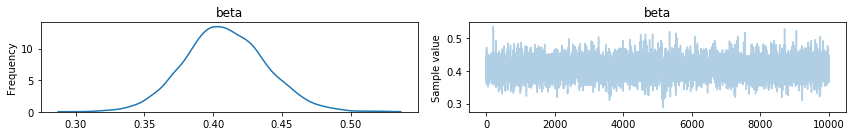

In [24]:
pm.traceplot(trace1)
pm.summary(trace1)

In [22]:
with pm.Model() as model2:
    beta = pm.Uniform('beta', 0,10)
    measurement = pm.Gamma('measurement',alpha=2,beta=beta,observed=k3_t0_three)
        
    start = pm.find_MAP()
    trace2 = pm.sample(10000)

Optimization terminated successfully.
         Current function value: 285.885958
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -287.82: 100%|██████████| 200000/200000 [00:14<00:00, 13851.02it/s]
Finished [100%]: Average ELBO = -287.82
100%|██████████| 10000/10000 [00:04<00:00, 2466.38it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.814            0.042            0.001            [0.729, 0.897]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.732          0.786          0.814          0.843          0.900



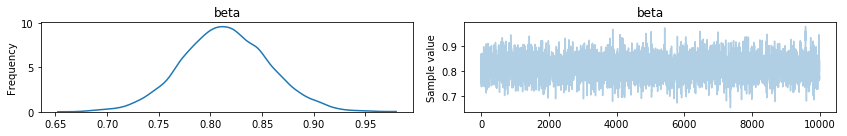

In [23]:
pm.traceplot(trace2)
pm.summary(trace2)

In [18]:
with pm.Model() as model3:
    beta = pm.Uniform('beta', 0,10)
    measurement = pm.Gamma('measurement',alpha=3,beta=beta,observed=k3_t0_three)
        
    start = pm.find_MAP()
    trace3 = pm.sample(10000)

Optimization terminated successfully.
         Current function value: 267.483202
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -269.58: 100%|██████████| 200000/200000 [00:14<00:00, 14069.15it/s]
Finished [100%]: Average ELBO = -269.57
100%|██████████| 10000/10000 [00:04<00:00, 2346.26it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.219            0.053            0.001            [1.113, 1.325]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.115          1.184          1.219          1.254          1.329



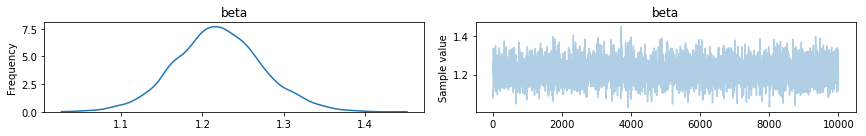

In [20]:
pm.traceplot(trace3)
pm.summary(trace3)

In [25]:
with pm.Model() as model4:
    beta = pm.Uniform('beta', 0,10)
    measurement = pm.Gamma('measurement',alpha=4,beta=beta,observed=k3_t0_three)
        
    start = pm.find_MAP()
    trace4 = pm.sample(10000)

Optimization terminated successfully.
         Current function value: 260.626195
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -262.81: 100%|██████████| 200000/200000 [00:14<00:00, 13426.72it/s]
Finished [100%]: Average ELBO = -262.81
100%|██████████| 10000/10000 [00:04<00:00, 2274.77it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.627            0.061            0.001            [1.504, 1.743]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.508          1.587          1.626          1.667          1.748



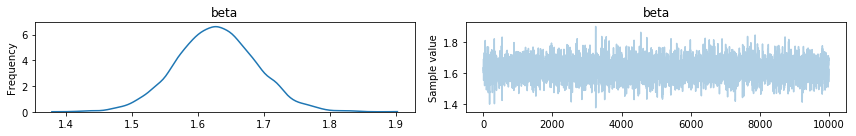

In [26]:
pm.traceplot(trace4)
pm.summary(trace4)

In [27]:
with pm.Model() as model5:
    beta = pm.Uniform('beta', 0,10)
    measurement = pm.Gamma('measurement',alpha=5,beta=beta,observed=k3_t0_three)
        
    start = pm.find_MAP()
    trace5 = pm.sample(10000)

Optimization terminated successfully.
         Current function value: 259.927811
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -262.17: 100%|██████████| 200000/200000 [00:15<00:00, 12714.83it/s]
Finished [100%]: Average ELBO = -262.17
100%|██████████| 10000/10000 [00:04<00:00, 2210.49it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.032            0.068            0.001            [1.893, 2.164]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.898          1.986          2.030          2.076          2.171



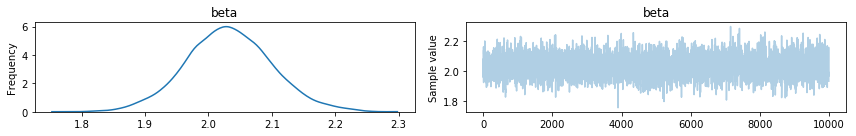

In [29]:
pm.traceplot(trace5)
pm.summary(trace5)

In [30]:
with pm.Model() as model6:
    beta = pm.Uniform('beta', 0,10)
    measurement = pm.Gamma('measurement',alpha=6,beta=beta,observed=k3_t0_three)
        
    start = pm.find_MAP()
    trace6 = pm.sample(10000)

Optimization terminated successfully.
         Current function value: 263.063986
         Iterations: 4
         Function evaluations: 5
         Gradient evaluations: 5


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -265.35: 100%|██████████| 200000/200000 [00:14<00:00, 13391.26it/s]
Finished [100%]: Average ELBO = -265.35
100%|██████████| 10000/10000 [00:04<00:00, 2456.39it/s]



beta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.436            0.073            0.001            [2.292, 2.581]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  2.293          2.386          2.435          2.484          2.583



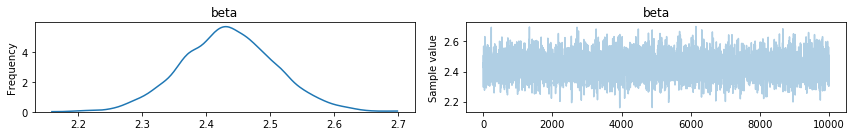

In [31]:
pm.traceplot(trace6)
pm.summary(trace6)

In [34]:
N=[1,2,3,4,5,6]
beta_0=np.array([trace1['beta'].mean(),
       trace2['beta'].mean(),
       trace3['beta'].mean(),
       trace4['beta'].mean(),
       trace5['beta'].mean(),
       trace6['beta'].mean()])
beta_0_std = np.array([trace1['beta'].std(),
                       trace2['beta'].std(),
                       trace3['beta'].std(),
                       trace4['beta'].std(),
                       trace5['beta'].std(),
                       trace6['beta'].std()])

In [56]:
# now we need to calculate the likelihood function
def gamma_like(data,alpha,beta):
    p = sps.gamma.pdf(data,alpha,scale=1/beta)
    return np.prod(p)
def gamma_like_log(data,alpha,beta):
    p = np.log(sps.gamma.pdf(data,alpha,scale=1/beta))
    return np.sum(p)

In [57]:
p_like=np.array([gamma_like(k3_t0_three,1,trace1['beta'].mean()),
                gamma_like(k3_t0_three,2,trace2['beta'].mean()),
                gamma_like(k3_t0_three,3,trace3['beta'].mean()),
                gamma_like(k3_t0_three,4,trace4['beta'].mean()),
                gamma_like(k3_t0_three,5,trace5['beta'].mean()),
                gamma_like(k3_t0_three,6,trace6['beta'].mean()),]) 
p_like_log=np.array([gamma_like_log(k3_t0_three,1,trace1['beta'].mean()),
                gamma_like_log(k3_t0_three,2,trace2['beta'].mean()),
                gamma_like_log(k3_t0_three,3,trace3['beta'].mean()),
                gamma_like_log(k3_t0_three,4,trace4['beta'].mean()),
                gamma_like_log(k3_t0_three,5,trace5['beta'].mean()),
                gamma_like_log(k3_t0_three,6,trace6['beta'].mean()),])                 

In [58]:
p_like_log

array([-330.89982913, -283.29329319, -265.24880755, -258.63301153,
       -258.10694249, -261.37260325])

In [62]:
print(p_like*beta_0_std)

[  5.84308759e-146   3.90596775e-125   3.40169912e-117   2.89676639e-114
   5.45406803e-114   2.25563743e-115]


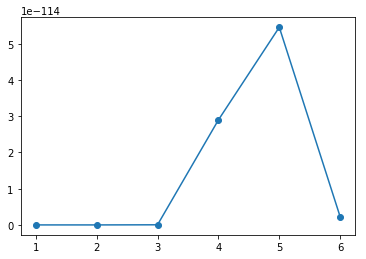

In [63]:
plt.plot(N,p_like*beta_0_std,"o-")